# Laboratorio 2 - Inteligencia Artificial 
Fabiola Contreras -
Diego Duarte -
Maria Jose Villafuerte

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import pandas as pd
from sklearn.decomposition import PCA

### 1. Simular lanzamientos de una moneda en la computadora 

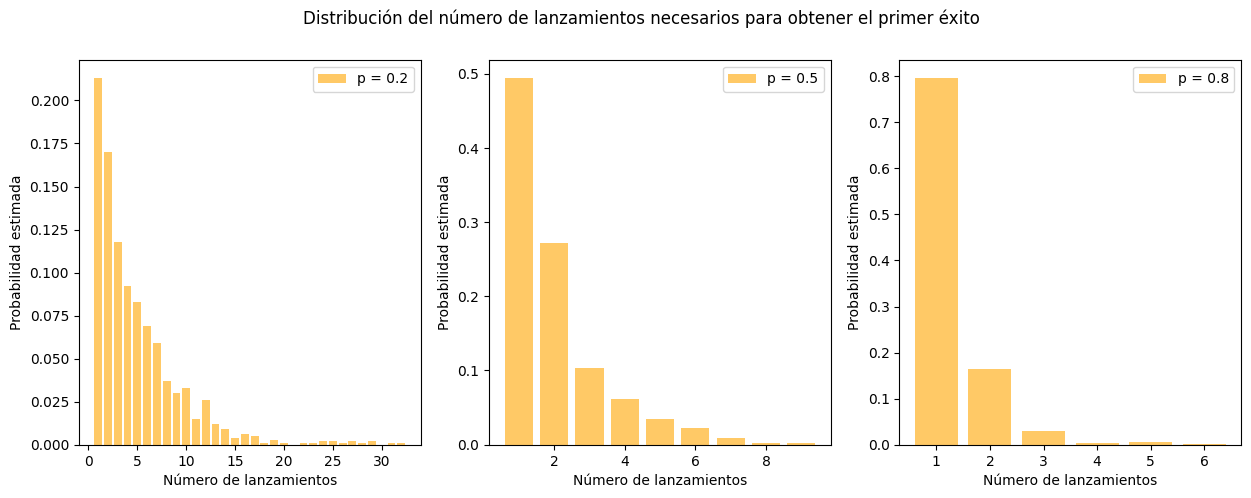

In [3]:
#Simulación de lanzamiento de moneda
def throw_coin(p):
    #Esta función regresa una lista de intentos necesarios para cada simulacion. 
    return np.random.geometric(p, size=1000)

# Graficación de la funcion densidad 
def plot_density(data, p, ax):
    #Regresa la cantidad de los valores unicos que se repitan 
    values, counts = np.unique(data, return_counts=True)
    ax.bar(values, counts / counts.sum(), alpha=0.6, color='orange', label=f"p = {p}")
    ax.set_xlabel("Número de lanzamientos")
    ax.set_ylabel("Probabilidad estimada")
    ax.legend()

# Valores de probabilidad de exito a probar
p_values = [0.2, 0.5, 0.8]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Simulación con diferentes probabilidades
for p, ax in zip(p_values, axes):
    data = throw_coin(p)
    plot_density(data, p, ax)

plt.suptitle("Distribución del número de lanzamientos necesarios para obtener el primer éxito")
plt.show()    

### 2. Comparación de dos muestras


 Geom(p)
KS-statistic: 0.11, p-value: 1.0915917613597424e-05
KstestResult(statistic=np.float64(0.11), pvalue=np.float64(1.0915917613597424e-05), statistic_location=np.int32(1), statistic_sign=np.int8(1))


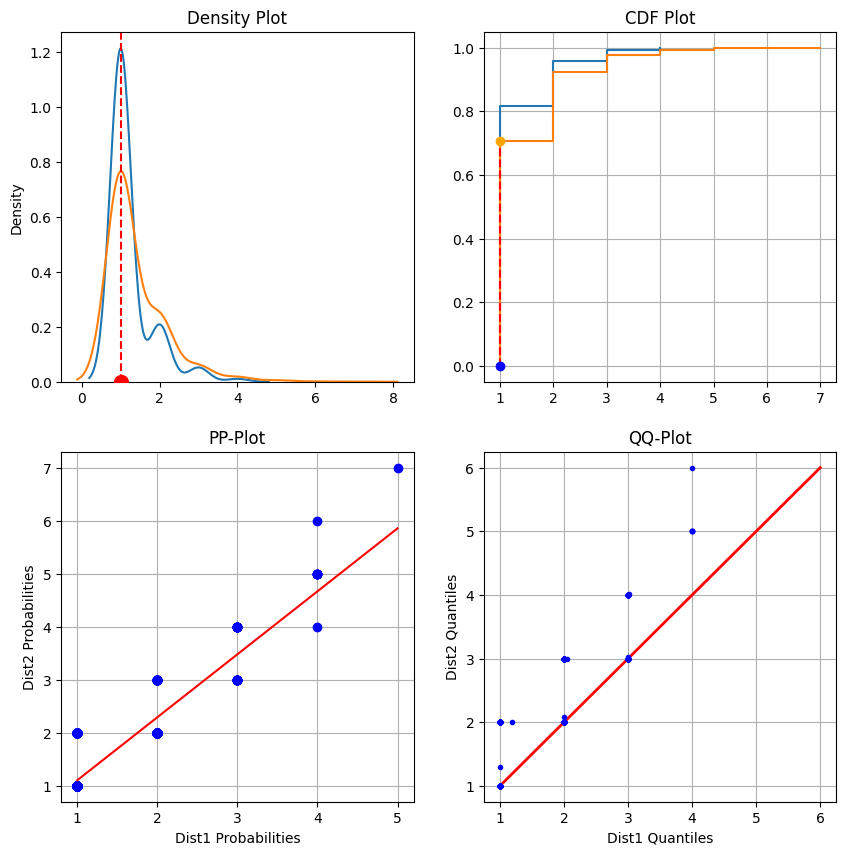


 Geom(q)
KS-statistic: 0.241, p-value: 6.914010091642317e-26
KstestResult(statistic=np.float64(0.241), pvalue=np.float64(6.914010091642317e-26), statistic_location=np.int32(1), statistic_sign=np.int8(1))


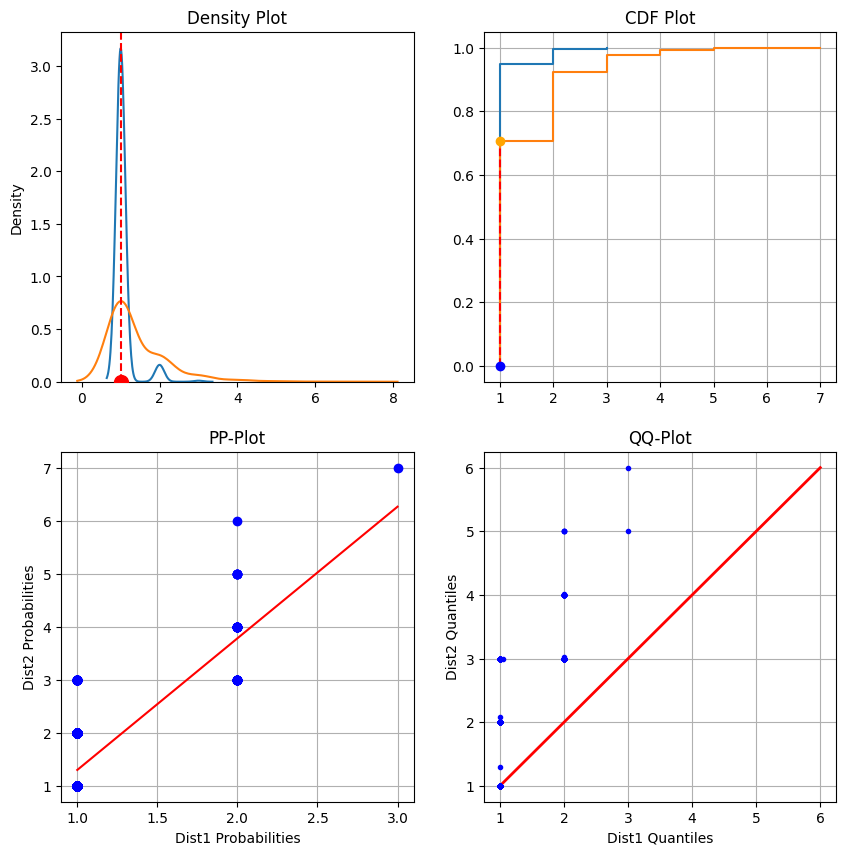

In [23]:
# Función para calcular la ECDF (Función de distribución empírica)
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def compare_samples(data1, data2, p1):
    x1, y1 = ecdf(data1)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(data2)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)

    plt.figure(figsize=(10, 10))

    # Distancia KS
    ks_statistic, p_value = sps.ks_2samp(data1, data2, alternative='two-sided')
    print(f"KS-statistic: {ks_statistic}, p-value: {p_value}")

    # Encontrar el punto donde la diferencia es máxima
    # Interpolamos y2 a la misma longitud de y1 (para comparar correctamente)
    from scipy.interpolate import interp1d
    interp_y2 = interp1d(x2, y2, kind='previous', bounds_error=False, fill_value=(0, 1))
    y2_interp = interp_y2(x1)  # Obtener valores de y2 en los mismos puntos que x1

    # Determinar el índice donde ocurre la distancia máxima
    idx = np.argmax(np.abs(y1 - y2_interp))
    ks_x = x1[idx]  # Punto en X donde ocurre la distancia KS
    ks_y1 = y1[idx]  # Valor de ECDF1 en ese punto
    ks_y2 = y2_interp[idx]  # Valor de ECDF2 en ese punto

    # a) Las funciones de densidad f1 y f2.
    plt.subplot(2,2,1)
    sns.kdeplot(data1, bw_method=0.5, label='dist1')
    sns.kdeplot(data2, bw_method=0.5, label='dist2')
    plt.title('Density Plot')

    # Marcar el punto KS en la densidad
    plt.axvline(ks_x, color='red', linestyle='dashed', label=f'KS @ x={ks_x}')
    plt.scatter([ks_x], [0], color='red', zorder=3, label="KS Point", marker="o", s=100)

    # b) Las funciones de distribución F1 y F2.
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')

    # Marcar el punto donde ocurre la distancia KS
    plt.vlines(ks_x, ks_y1, ks_y2, colors='r', linestyle='dashed', label=f'KS = {ks_statistic:.3f}')
    plt.scatter([ks_x], [ks_y1], color='blue', zorder=3)  # Punto en la ECDF1
    plt.scatter([ks_x], [ks_y2], color='orange', zorder=3)  # Punto en la ECDF2

    plt.grid(True)
    plt.title('CDF Plot')

    # c) Una gráfica PP (prob-prob).
    plt.subplot(2,2,3)
    sps.probplot(data2, dist="geom", sparams=(p1,), plot=plt)
    
    plt.grid(True)
    plt.title('PP-Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    # d) Una gráfica QQ (quantil-quantil).
    plt.subplot(2,2,4)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(data1, qqs)
    qq2 = np.quantile(data2, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # Prueba de hipótesis de Kolmogorov-Smirnov
    print(sps.kstest(data1, data2))

    plt.show()

# Comparar la distribución del inciso anterior con muestra aleatoria
# i) Geom(p)
p1 = 0.8
data1 = np.random.geometric(p=p1, size=1000)
data = throw_coin(0.73)
print("\n Geom(p)")
compare_samples(data1, data, p1)

# ii) Geom(q), para q = 1.2p 
# q = 1.2 * 0.8
p1 = 0.96
data2 = np.random.geometric(p=p1, size=1000)
print("\n Geom(q)")
compare_samples(data2, data, p1)



### 3. Ley de Benford 

In [11]:
import scipy.stats as stats
import re
import pandas as pd
import numpy as np

def extract_first_digit(area):
    match = re.search(r"[1-9]", str(area))  
    return int(match.group()) if match else None

def benford(d):
    return np.log10(1+1/np.array(d))

def KolmogrovSmirnov(data):
    datos = np.array(data)
    distribucion_teorica = benford(range(1, 10))
    ks_statistic, p_value = stats.ks_1samp(datos, lambda x: np.cumsum(distribucion_teorica)[x-1])

    # Imprimir los resultados
    print("Estadístico de prueba (ks_statistic) = %.20f" % ks_statistic)
    print("p-value = %.20f" % p_value)

    # Interpretación
    alpha = 0.05
    if p_value > alpha:
        print("No hay suficiente evidencia para rechazar la Ley de Benford. Los datos pueden seguirla.")
    else:
        print("Los datos NO siguen la Ley de Benford con suficiente confianza.")
        
df = pd.read_csv("data/areas.csv", delimiter=";")


### 4. Distribución gaussiana multivariada 

C:\Users\diego\AppData\Local\Temp\ipykernel_23064\830997112.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  Z = np.random.multivariate_normal(mu, sig0, size=500)
C:\Users\diego\AppData\Local\Temp\ipykernel_23064\830997112.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z[:,i], kde=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_23064\830997112.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to

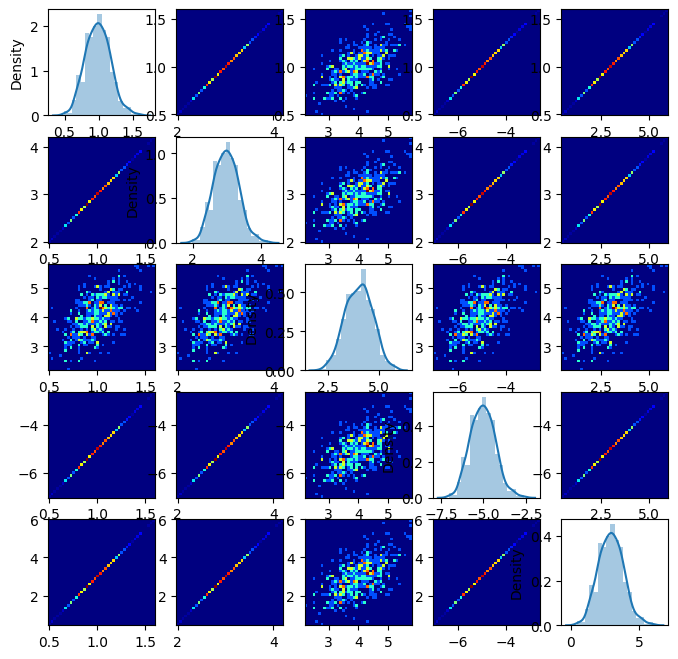

Media teórica:
 [ 1.  3.  4. -5.  3.]
Media muestral:
 [ 0.99202341  2.98404681  4.031476   -5.03190638  2.96011703]

Matriz de covarianza teórica:
 [[0.1 0.2 0.3 0.4 0.5]
 [0.1 0.2 0.  0.4 0.5]
 [0.1 0.2 0.3 0.4 0.5]
 [0.1 0.2 0.3 0.4 0.5]
 [0.1 0.2 0.3 0.4 0.5]]
Matriz de covarianza muestral:
 [[0.03283218 0.06566435 0.06841536 0.13132871 0.16416088]
 [0.06566435 0.13132871 0.13683072 0.26265741 0.32832177]
 [0.06841536 0.13683072 0.43728167 0.27366143 0.34207679]
 [0.13132871 0.26265741 0.27366143 0.52531482 0.65664353]
 [0.16416088 0.32832177 0.34207679 0.65664353 0.82080441]]


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parámetros de la distribución
d = int(input("Ingrese la dimensión de la distribución (d ≥ 4): "))

# Solicitar el vector de medias
mu = np.array([float(input(f"Ingrese la media para X{i+1}: ")) for i in range(d)])

# Solicitar la matriz de covarianza
sig0 = np.array([list(map(float, input(f"Ingrese la matriz de covarianza fila por fila (separando valores con espacios) - Fila {i+1}: ").split())) for i in range(d)])


# Generar una muestra aleatoria
Z = np.random.multivariate_normal(mu, sig0, size=500)

plt.figure(figsize=(8,8))
for i in range(0, d):
    for j in range(0, d):
        plt.subplot(d, d, d*i+j+1)
        if (i==j):
            sns.distplot(Z[:,i], kde=True)
        else:
            plt.hist2d(Z[:,j], Z[:,i], bins=(40,40), cmap=plt.cm.jet)
plt.show()

mu_muestra = np.mean(Z, axis=0)
Sigma_muestra = np.cov(Z, rowvar=False)

# Comparar con los valores teóricos
print("Media teórica:\n", mu)
print("Media muestral:\n", mu_muestra)
print("\nMatriz de covarianza teórica:\n", sig0)
print("Matriz de covarianza muestral:\n", Sigma_muestra)


### 5. Comparación de estaciones

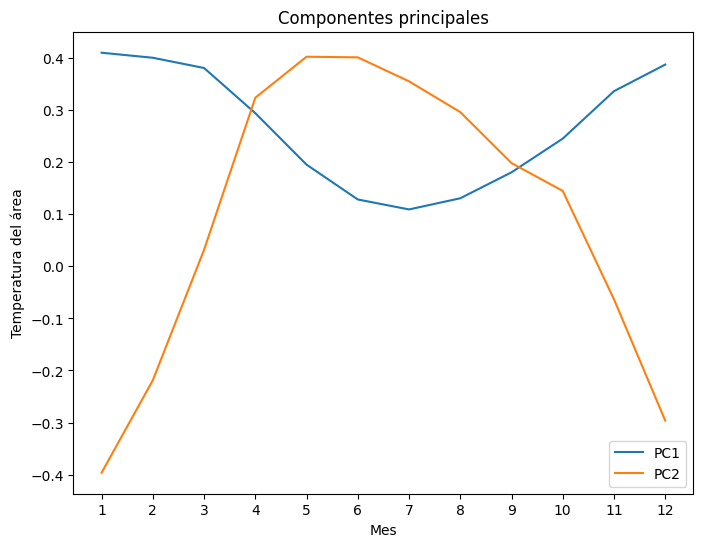

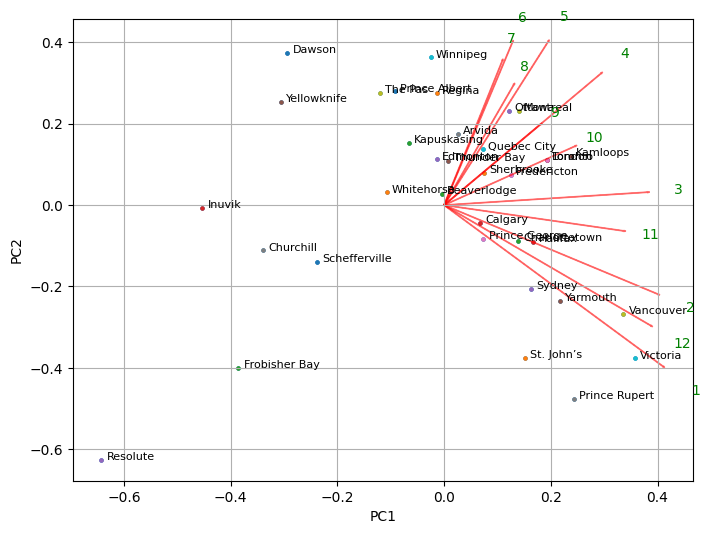

In [62]:
from sklearn.preprocessing import StandardScaler

# Leer los datos
weather_data = pd.read_csv('data/weather.csv', sep=',', header=0)
station_names = weather_data.iloc[:,-1]
data = weather_data.iloc[:,:-1]

# Normalizar los datos
X = weather_data.values[:,:12].astype(np.float32)  # la última columna es el nombre de la estación
X_scaled = StandardScaler().fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=12)
principal_components = pca.fit_transform(X)

# p1 y p2
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), pca.components_[0], label="PC1")
plt.plot(range(1, 13), pca.components_[1], label="PC2")
plt.xlabel("Mes")
plt.ylabel("Temperatura del área")
plt.title("Componentes principales")
plt.legend()
plt.xticks(range(1, 13))  # Mostrar todos los meses en el eje x
plt.show()

# estaciones en el biplot
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    
    for i in range(len(station_names)):
        plt.scatter(xs[i] * scalex, ys[i] * scaley, s=5, label=station_names[i])
        plt.text(xs[i] * scalex + 0.01, ys[i] * scaley, station_names[i], fontsize=8)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(8,6))
mybiplot(principal_components[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()